# Case Study: Divvy Exercise Full Year Analysis 

The purpose of this notebook is to conduct an analysis for the Google Data Analysis Capstone Project on Coursera. In this case study I was provided data from a bike-share company called Divvy. For the purpose of this exercise, and from now on, Divvy will be referred to as Cyclistic. In this exercise, I work for a fictional company, Cyclistic. In order to answer the key business questions, I will follow the steps of the Data Analysis Process: Act, Prepare, Process, Analyze, Share and Act.

**The Business Task**

To deliver recommendations by analyzing the 2019 - 2020 trip data for Cyclistic that is used to answer the key question: "In what ways do casual riders and members use Divvy bikes differently?". The data will be consolidated into a single dataframe prior to starting the analysis.

**Description of Data Sources Used**

I used twelve-months of historical trip dataset provided by Cyclistic to perform this analysis. This includes four different files each containing a quarterly (3 months) of data ranging from April 2019 - March 2020. The data is public and has been made available by Motivate International Inc. under this [License](https://ride.divvybikes.com/data-license-agreement).

**Data Cleaning and Manipulation**

I used Python to have the data collected, wrangled, cleaned, stacked, manipulated and combined to perform my analysis. I will outline the steps with code samples to show my steps of the Data Analysis Process. 

**Load the required packages in Python**

**Pandas** for analyzing, cleaning, exploring, and manipulating data
> * pandas.api.types subpackage holds some public functions for plotting graphs
> * datetime to help with date formating and functions

**Matplotlib** which is a popular library for data visualization in Python
> * matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB
> * matplotlib.patches

In [1]:
import pandas as pd 
from pandas.api.types import CategoricalDtype
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## STEP 1: COLLECT DATA

In [2]:
# Change source path of files
csv_file_1 = '/kaggle/input/divvy-trips/Divvy_Trips_2019_Q2.csv'
csv_file_2 = '/kaggle/input/divvy-trips/Divvy_Trips_2019_Q3.csv'
csv_file_3 = '/kaggle/input/divvy-trips/Divvy_Trips_2019_Q4.csv'
csv_file_4 = '/kaggle/input/divvy-trips/Divvy_Trips_2020_Q1.csv'

df_file_1 = pd.read_csv(csv_file_1)
df_file_2 = pd.read_csv(csv_file_2)
df_file_3 = pd.read_csv(csv_file_3)
df_file_4 = pd.read_csv(csv_file_4)

## STEP 2: WRANGLE DATA AND COMBINE INTO A SINGLE FILE

In [3]:
# Compare column names for each of the files
# The columns will be reordered after they are renamed
print(df_file_1.columns)
print(df_file_2.columns)
print(df_file_3.columns)
print(df_file_4.columns)

Index(['01 - Rental Details Rental ID', '01 - Rental Details Local Start Time',
       '01 - Rental Details Local End Time', '01 - Rental Details Bike ID',
       '01 - Rental Details Duration In Seconds Uncapped',
       '03 - Rental Start Station ID', '03 - Rental Start Station Name',
       '02 - Rental End Station ID', '02 - Rental End Station Name',
       'User Type', 'Member Gender',
       '05 - Member Details Member Birthday Year'],
      dtype='object')
Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')
Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start

In [4]:
# Rename columns  to make them consistent with q1_2020 
df_file_1_names = {'01 - Rental Details Rental ID' : 'ride_id',
                   '01 - Rental Details Local Start Time' : 'started_at',
                   '01 - Rental Details Local End Time' : 'ended_at',
                   '01 - Rental Details Bike ID' : 'rideable_type',
                   '01 - Rental Details Duration In Seconds Uncapped' : 'tripduration',
                   '03 - Rental Start Station ID' : 'start_station_id',
                   '03 - Rental Start Station Name' : 'start_station_name',
                   '02 - Rental End Station ID' : 'end_station_id',
                   '02 - Rental End Station Name' : 'end_station_name',
                   'User Type' : 'member_casual',
                   'Member Gender' : 'gender',
                   '05 - Member Details Member Birthday Year' : 'birthyear'}
df_file_2_names = {'trip_id' : 'ride_id',
                   'start_time' : 'started_at',
                   'end_time' : 'ended_at',
                   'bikeid' : 'rideable_type',
                   'from_station_id' : 'start_station_id',
                   'from_station_name' : 'start_station_name',
                   'to_station_id' : 'end_station_id',
                   'to_station_name' : 'end_station_name',
                   'usertype' : 'member_casual'}
df_file_3_names = {'trip_id' : 'ride_id',
                   'start_time' : 'started_at',
                   'end_time' : 'ended_at',
                   'bikeid' : 'rideable_type',
                   'from_station_id' : 'start_station_id',
                   'from_station_name' : 'start_station_name',
                   'to_station_id' : 'end_station_id',
                   'to_station_name' : 'end_station_name',
                   'usertype' : 'member_casual'}
                   
# Rename the columns using the dictionary
df_file_1.rename(columns=df_file_1_names, inplace = True)
df_file_2.rename(columns=df_file_2_names, inplace = True)
df_file_3.rename(columns=df_file_3_names, inplace = True)

# Drop the columns you want to remove
df_file_1.drop(['tripduration', 'gender', 'birthyear'], axis=1, inplace=True)
df_file_2.drop(['tripduration', 'gender', 'birthyear'], axis=1, inplace=True)
df_file_3.drop(['tripduration', 'gender', 'birthyear'], axis=1, inplace=True)
df_file_4.drop(['start_lat', 'start_lng', 'end_lat', 'end_lng'], axis=1, inplace=True)

#Confirm list of column names after updates
print(df_file_1.columns)
print(df_file_2.columns)
print(df_file_3.columns)
print(df_file_4.columns)

# Reorder the columns of df_file_1, df_file_2 and df_file_3 to match df_file_4
df_file_1 = df_file_1.reindex(columns=df_file_4.columns)
df_file_2 = df_file_2.reindex(columns=df_file_4.columns)
df_file_3 = df_file_3.reindex(columns=df_file_4.columns)

# Concatenate the four DataFrames
df_all_trips = pd.concat([df_file_1, df_file_2, df_file_3, df_file_4])

# Drop rows with null or empty values in any column
df_all_trips.dropna(inplace=True)

Index(['ride_id', 'started_at', 'ended_at', 'rideable_type',
       'start_station_id', 'start_station_name', 'end_station_id',
       'end_station_name', 'member_casual'],
      dtype='object')
Index(['ride_id', 'started_at', 'ended_at', 'rideable_type',
       'start_station_id', 'start_station_name', 'end_station_id',
       'end_station_name', 'member_casual'],
      dtype='object')
Index(['ride_id', 'started_at', 'ended_at', 'rideable_type',
       'start_station_id', 'start_station_name', 'end_station_id',
       'end_station_name', 'member_casual'],
      dtype='object')
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'member_casual'],
      dtype='object')


In [5]:
# Inspect the dataframe and check for data type for each column
print(df_all_trips.dtypes)

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id        int64
end_station_name       object
end_station_id        float64
member_casual          object
dtype: object


In [6]:
# Convert columns to ensure they are consistent so that they can stack correctly
df_all_trips['ride_id'] = df_all_trips['ride_id'].astype(str)
df_all_trips['rideable_type'] = df_all_trips['rideable_type'].astype(str)
df_all_trips['started_at'] = pd.to_datetime(df_all_trips['started_at'])
df_all_trips['ended_at'] = pd.to_datetime(df_all_trips['ended_at'])
df_all_trips['start_station_name'] = df_all_trips['start_station_name'].astype(str)
df_all_trips['start_station_id'] = df_all_trips['start_station_id'].astype(int)
df_all_trips['end_station_name'] = df_all_trips['end_station_name'].astype(str)
df_all_trips['end_station_id'] = df_all_trips['end_station_id'].astype(int)
df_all_trips['member_casual'] = df_all_trips['member_casual'].astype(str)

# Confirm the columns in dataframe have updated
print(df_all_trips.dtypes)

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id               int64
end_station_name              object
end_station_id                 int64
member_casual                 object
dtype: object


## STEP 3: CLEAN UP AND ADD DATA TO PREPARE FOR ANALYSIS

#### Inspect the new table that has been created

In [7]:
print(df_all_trips)

                 ride_id rideable_type          started_at  \
0               22178529          6251 2019-04-01 00:02:22   
1               22178530          6226 2019-04-01 00:03:02   
2               22178531          5649 2019-04-01 00:11:07   
3               22178532          4151 2019-04-01 00:13:01   
4               22178533          3270 2019-04-01 00:19:26   
...                  ...           ...                 ...   
426882  ADDAA33CEBCAE733   docked_bike 2020-03-10 10:40:06   
426883  82B10FA3994BC66A   docked_bike 2020-03-07 15:25:55   
426884  AA0D5AAA0B59C8AA   docked_bike 2020-03-01 13:12:38   
426885  3296360A7BC20FB8   docked_bike 2020-03-07 18:02:45   
426886  064EC7698E4FF9B3   docked_bike 2020-03-08 13:03:57   

                  ended_at         start_station_name  start_station_id  \
0      2019-04-01 00:09:48         Daley Center Plaza                81   
1      2019-04-01 00:20:30        Wood St & Taylor St               317   
2      2019-04-01 00:15:19  La

There are a few problems we will need to fix:
1. In the "member_casual" column, there are two names for members ("member" and "Subscriber") and two names for casual riders ("Customer" and "casual"). We will need to consolidate that from four to two labels.
1. The data can only be aggregated at the ride-level, which is too granular. We will want to add some additional columns of data -- such as day, month, year -- that provide additional opportunities to aggregate the data.
1. We will want to add a calculated field for length of ride since the 2020Q1 data did not have the "tripduration" column. We will add "ride_length" to the entire dataframe for consistency.
1. There are some rides where tripduration shows up as negative, including several hundred rides where Divvy took bikes out of circulation for Quality Control reasons. We will want to delete these rides.

In [8]:
# In the "member_casual" column, replace "Subscriber" with "member" and "Customer" with "casual"
df_all_trips['member_casual'].replace({'Subscriber': 'member', 'Customer': 'casual'}, inplace=True)

# Check to make sure the proper number of observations were reassigned
# Count the values in the 'member_casual' column
counts = df_all_trips['member_casual'].value_counts()
print(counts)

member    2676458
casual     835052
Name: member_casual, dtype: int64


In [9]:
# Add columns that list the date, month, day, and year of each ride
# This will allow us to aggregate ride data for each month, day, or year
df_all_trips['day'] = df_all_trips['started_at'].dt.day
df_all_trips['hour'] = df_all_trips['started_at'].dt.hour
df_all_trips['month'] = df_all_trips['started_at'].dt.month
df_all_trips['year'] = df_all_trips['started_at'].dt.year
df_all_trips['day_of_week'] = df_all_trips['started_at'].dt.day_name()

In [10]:
# Add a "ride_length" calculation to all_trips (in seconds)
df_all_trips['ride_length'] = (df_all_trips['ended_at'] - df_all_trips['started_at']).dt.total_seconds()

# Inspect the structure of the columns
#print(df_all_trips.columns)

In [11]:
# Filter the negative values in 'ride_length'
df_all_trips = df_all_trips[df_all_trips['ride_length'] > 0]

# Filter out starting station name with 'HQ QR' these are bikes at headquarters
df_all_trips = df_all_trips[df_all_trips['start_station_name'] != 'HQ QR']

# Inspect the ride length to make sure there's no negative
# make sure there's no 'HQ QR' starting station names
print(df_all_trips[df_all_trips['ride_length'] < 0])
print(df_all_trips[df_all_trips['start_station_name'] == 'HQ QR'])

Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, member_casual, day, hour, month, year, day_of_week, ride_length]
Index: []
Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, member_casual, day, hour, month, year, day_of_week, ride_length]
Index: []


## STEP 4: CONDUCT DESCRIPTIVE ANALYSIS

In [12]:
# Descriptive analysis on ride_length (all figures in seconds)

# Calculate mean ride length by member_casual
mean_ride_length = df_all_trips.groupby('member_casual')['ride_length'].mean()

# Calculate median ride length by member_casual
median_ride_length = df_all_trips.groupby('member_casual')['ride_length'].median()

# Calculate maximum ride length by member_casual
max_ride_length = df_all_trips.groupby('member_casual')['ride_length'].max()

# Calculate minimum ride length by member_casual
min_ride_length = df_all_trips.groupby('member_casual')['ride_length'].min()

# These will provide summary data for 'ride_length' such as min, max, std, etc...
summary = df_all_trips['ride_length'].describe()
mode = df_all_trips['ride_length'].mode()

# print the summary data
print(summary, mode)

count    3.507731e+06
mean     1.496604e+03
std      3.076057e+04
min      1.000000e+00
25%      4.200000e+02
50%      7.200000e+02
75%      1.310000e+03
max      9.387024e+06
Name: ride_length, dtype: float64 0    300.0
dtype: float64


In [13]:
# Define the order of the days of the week
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a categorical variable with the defined order for days of week
cat_weekdays = pd.Categorical(df_all_trips['day_of_week'], categories=weekdays_order, ordered=True)

# Group by member_casual and the categorical weekdays variable and calculate the mean ride length
mean_ride_length_day = df_all_trips.groupby(['member_casual', cat_weekdays])['ride_length'].mean()

# Now, let's run the average ride time by each day for members vs casual users
mean_ride_length_ride_time = df_all_trips.groupby(['member_casual', 'day_of_week'])['ride_length'].mean().reset_index()

# create a weekday categorical type with ordered days
weekday_cats = CategoricalDtype(categories= weekdays_order, ordered=True)

# create a new dataframe with counts of each weekday and member type
grouped_data = df_all_trips.groupby(['member_casual', 'day_of_week']).size().reset_index(name='count')

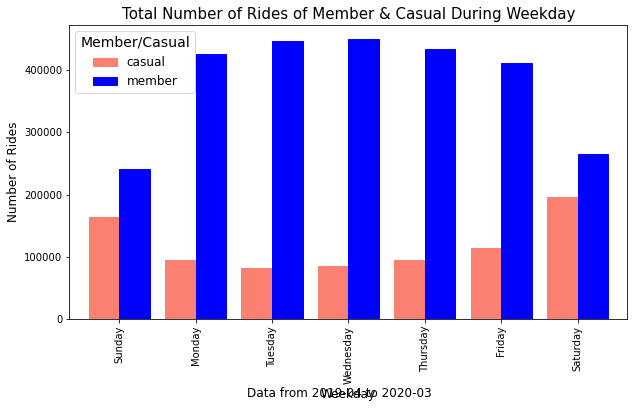

In [14]:
# Let's visualize the total number of rides by rider type during the weekday

# create a sample dataframe
data = grouped_data
df = pd.DataFrame(data)

# define colors for member and casual categories
colors = {'member': 'blue', 'casual': 'Salmon'}

# create a list of weekdays in the desired order
weekdays_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# convert the day_of_week column to a categorical data type with the specified order
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=weekdays_order, ordered=True)

# create a pivot table with day_of_week as index, member_casual as columns, and count as values
pivot_df = df.pivot_table(index='day_of_week', columns='member_casual', values='count')

# create the plot
ax = pivot_df.plot(kind='bar', figsize=(10,6), width=0.8)

# set the title, axes labels, and legend
ax.set_title('Total Number of Rides of Member & Casual During Weekday', fontsize=15)
ax.set_xlabel('Weekday', fontsize=12)
ax.set_ylabel('Number of Rides', fontsize=12)

# set the colors for each group
handles = []
for i, bars in enumerate(ax.containers):
    for bar in bars:
        bar.set_color(colors[pivot_df.columns[i]])
    # create a custom legend handle for each group
    handle = mpatches.Patch(color=colors[pivot_df.columns[i]], label=pivot_df.columns[i])
    handles.append(handle)

# add the custom legend handles to the legend
ax.legend(handles=handles, fontsize=12, title='Member/Casual', title_fontsize=14)

# adjust the plot layout and show the plot
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, 0.02, 'Data from 2019-04 to 2020-03', ha='center', fontsize=12)
plt.show()

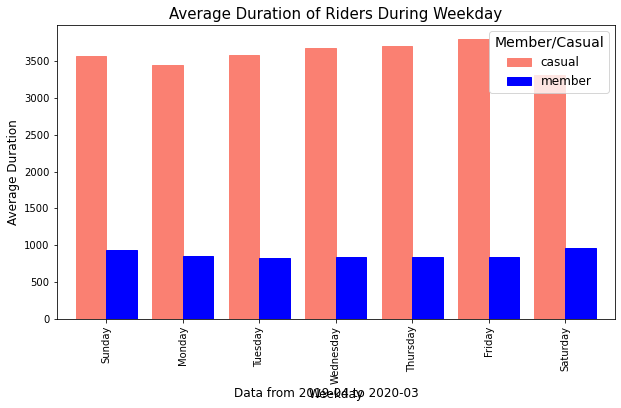

In [15]:
# Let's create a visualization for average durations of riders during the weekday

# create a new dataframe with counts of each weekday and member type
grouped_data = df_all_trips.groupby(['member_casual', 'day_of_week'])['ride_length'].mean().reset_index(name='avg_duration')

# create a sample dataframe
data = grouped_data
df = pd.DataFrame(data)

# define colors for member and casual categories
colors = {'member': 'blue', 'casual': 'Salmon'}

# create a list of weekdays in the desired order
weekdays_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# convert the day_of_week column to a categorical data type with the specified order
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=weekdays_order, ordered=True)

# create a pivot table with day_of_week as index, member_casual as columns, and count as values
pivot_df = df.pivot_table(index='day_of_week', columns='member_casual', values='avg_duration')

# create the plot
ax = pivot_df.plot(kind='bar', figsize=(10,6), width=0.8)

# set the title, axes labels, and legend
ax.set_title('Average Duration of Riders During Weekday', fontsize=15)
ax.set_xlabel('Weekday', fontsize=12)
ax.set_ylabel('Average Duration', fontsize=12)

# set the colors for each group
handles = []
for i, bars in enumerate(ax.containers):
    for bar in bars:
        bar.set_color(colors[pivot_df.columns[i]])
    # create a custom legend handle for each group
    handle = mpatches.Patch(color=colors[pivot_df.columns[i]], label=pivot_df.columns[i])
    handles.append(handle)

# add the custom legend handles to the legend
ax.legend(handles=handles, fontsize=12, title='Member/Casual', title_fontsize=14)

# adjust the plot layout and show the plot
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, 0.02, 'Data from 2019-04 to 2020-03', ha='center', fontsize=12)
plt.show()

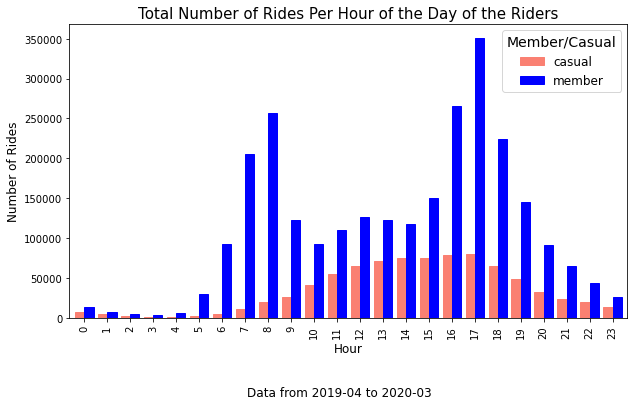

In [16]:
# Let's create a visualization for number of rides, per hour of day, by rider type

# create a new dataframe with counts of each hour and member type
grouped_data = df_all_trips.groupby(['member_casual', 'hour']).size().reset_index(name='count')

# create a sample dataframe
data = grouped_data
df = pd.DataFrame(data)

# define colors for member and casual categories
colors = {'member': 'blue', 'casual': 'Salmon'}

# create a pivot table with hour as index, member_casual as columns, and count as values
pivot_df = df.pivot_table(index='hour', columns='member_casual', values='count')

# create the plot
ax = pivot_df.plot(kind='bar', figsize=(10,6), width=0.8)

# set the title, axes labels, and legend
ax.set_title('Total Number of Rides Per Hour of the Day of the Riders', fontsize=15)
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Number of Rides', fontsize=12)

# set the colors for each group
handles = []
for i, bars in enumerate(ax.containers):
    for bar in bars:
        bar.set_color(colors[pivot_df.columns[i]])
    # create a custom legend handle for each group
    handle = mpatches.Patch(color=colors[pivot_df.columns[i]], label=pivot_df.columns[i])
    handles.append(handle)

# add the custom legend handles to the legend
ax.legend(handles=handles, fontsize=12, title='Member/Casual', title_fontsize=14)

# adjust the plot layout and show the plot
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, 0.02, 'Data from 2019-04 to 2020-03', ha='center', fontsize=12)
plt.show()

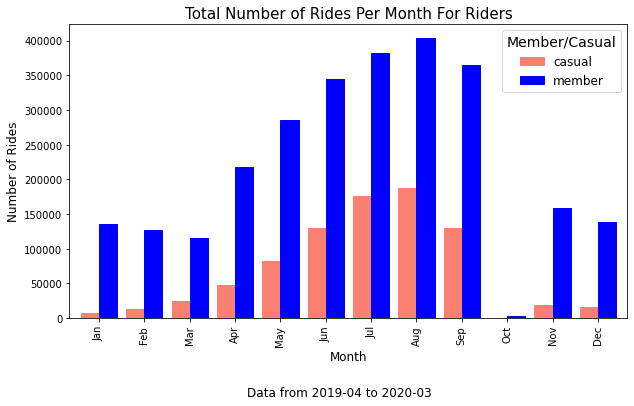

In [17]:
# Let's create a visualization for number of rides, during month of year, by rider type

# create a new dataframe with counts of each hour and member type
grouped_data = df_all_trips.groupby(['member_casual', 'month']).size().reset_index(name='count')

# create a sample dataframe
data = grouped_data
df = pd.DataFrame(data)

# define colors for member and casual categories
colors = {'member': 'blue', 'casual': 'Salmon'}

# create a new column with the month names
df['month_name'] = df['month'].apply(lambda x: datetime.strptime(str(x), "%m").strftime("%b"))

# define the desired order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# convert the month_name column to a categorical data type with the specified order
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

# sort the dataframe by the month order
df = df.sort_values('month_name')

# create a pivot table with hour as index, member_casual as columns, and count as values
pivot_df = df.pivot_table(index='month_name', columns='member_casual', values='count')

# create the plot
ax = pivot_df.plot(kind='bar', figsize=(10,6), width=0.8)

# set the title, axes labels, and legend
ax.set_title('Total Number of Rides Per Month For Riders', fontsize=15)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Number of Rides', fontsize=12)

# set the colors for each group
handles = []
for i, bars in enumerate(ax.containers):
    for bar in bars:
        bar.set_color(colors[pivot_df.columns[i]])
    # create a custom legend handle for each group
    handle = mpatches.Patch(color=colors[pivot_df.columns[i]], label=pivot_df.columns[i])
    handles.append(handle)

# add the custom legend handles to the legend
ax.legend(handles=handles, fontsize=12, title='Member/Casual', title_fontsize=14)

# adjust the plot layout and show the plot
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, 0.02, 'Data from 2019-04 to 2020-03', ha='center', fontsize=12)
plt.show()

## STEP 5: EXPORT SUMMARY FILE FOR FURTHER ANALYSIS

In [18]:
# Create a csv file that we will visualize in Excel, Tableau, or my presentation software
# Change the file location accordingly to export the data. 
# export the dataframe to a csv file
df.to_csv('my_cleaned_divvy_data.csv', index=False)

## Summary

casual riders tend to have fewer trips during the weekday than annual members. 
We believe this is due to members taking more rides to and from work. 
We suggest increasing casual riders weekday trips by advertsing at work communute hours (07:00 - 09:00 and 16:00 - 18:00).

We also recommend advertising between May and September. These were the busiest months of the year.

During our analysis we needed to clean the data performing the following tasks:
* renaming columns in the data files
* convert columns so the dataframes are consistent
* then we removed unwanted columns before stacking rows
* renamed the labels in member_casual to consolidate for consistancy
* added additional columns of data that provided additional oppertunities to aggregate data
* added calulcated field for length of ride for all data
* removed ride durations that were negative
* removed null and empty values
* aggregate data to show mean, median, max and min for casual and member riders for analysis

The issues mentioned could have affected the intrgity of this analysis, and we recommend looking into the source of the these problems.